In [10]:
import numpy as np
import pandas as pd
import csv

import time

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import ExtraTreeClassifier

import lightgbm as lgb

from sklearn.metrics import accuracy_score, classification_report


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv('dataset.csv')
# df.head()

# Extract the input features (all columns except the last one)
X = df.iloc[:, :-1].values
# Extract the labels (the last column)
y = df.iloc[:, -1].values



In [39]:
# Import the dataset for the folder

df = pd.read_csv('dataset.csv')


# Set the input and output variables:

# Extract the input features (all columns except the last one)
X = df.iloc[:, :-1].values

# Extract the labels (the last column)
y = df.iloc[:, -1].values

# Now X and y are ready to be used in your machine learning model


In [40]:
# Data analysis before the model building

classes = ['FOG', 'SOC', 'VS', 'WS', 'WF']

len(classes)

classes[4]

unique_classes, counts = np.unique(y, return_counts=True)
for unique_class, count in zip(unique_classes, counts):
    print(f'Class {unique_class}: {count} samples')

Class 0: 200 samples
Class 1: 200 samples
Class 2: 200 samples
Class 3: 200 samples
Class 4: 200 samples


In [41]:
# Data analysis before the model building

classes = ['FOG', 'SOC', 'VS', 'WS', 'WF']

# class 0 ---- FOG ---- FREEZING OF JOINTS
# class 1 ---- soc -----
# class 2 ---- VS ---- VOLINTERY STOP
# class 3 ---- WS ---- WALKING SLOW
# class 4 ---- WF ---- WAKING FAST 

# 

unique_classes, counts = np.unique(y, return_counts=True)
for unique_class, count in zip(unique_classes, counts):
    print(f'Class {unique_class}: {count} samples')


Class 0: 200 samples
Class 1: 200 samples
Class 2: 200 samples
Class 3: 200 samples
Class 4: 200 samples


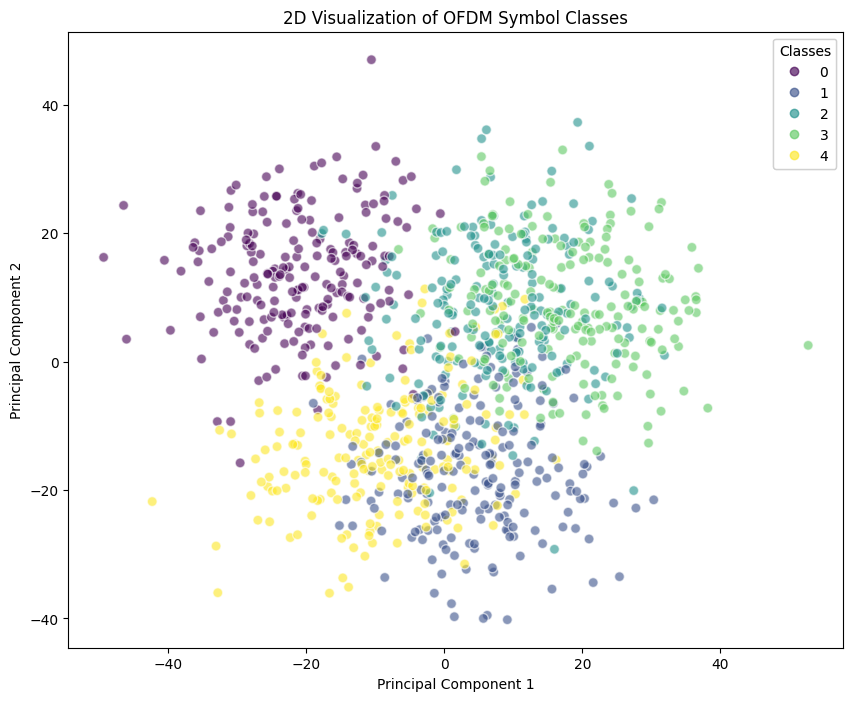

In [42]:
# Hear we want to display the sample. 
# It is usually difficult to display multi dimension system
# here we use single component to ddisplay the reslts


# Apply PCA and reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the reduced data
plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50, alpha=0.6, edgecolors='w')

# Add a legend for the classes
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of OFDM Symbol Classes')
plt.show()

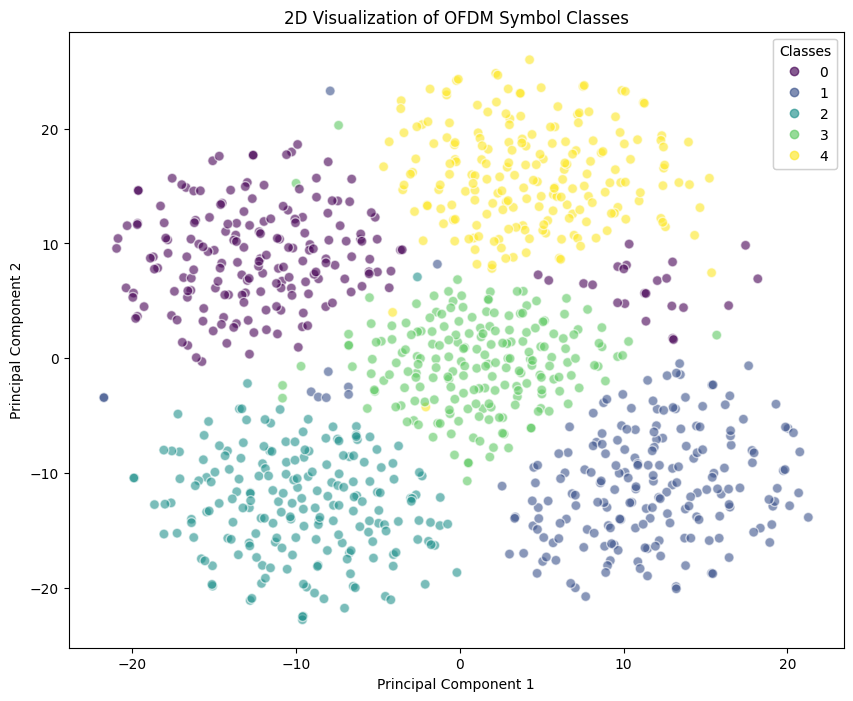

In [43]:
from sklearn.manifold import TSNE

# Apply t-SNE and reduce the data to 2 dimensions
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)


# Plot the reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50, alpha=0.6, edgecolors='w')

# Add a legend for the classes
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of OFDM Symbol Classes')
plt.show()

In [47]:
# from here we can see that we can seperate the classes using process signal

X.max()
X.min()

-37.63461935162163

# Data PreProcess

In [48]:
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

X.max()

1.0000000000000002

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape

(800, 200)

In [54]:
# min-max scaling

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)
# Min-max scalling scale the data between [0,1] for comvenicne

# Split the data into test train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# out of 1000 samples, divided in 800 and 200

print(X_train.shape)
print(X_test.shape)

(800, 200)
(200, 200)


# Random Forest for FOG detection

In [57]:
clf = RandomForestClassifier(n_estimators=200)
clf

RandomForestClassifier(n_estimators=200)

In [58]:
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)
y_pred, y_test

(array([3, 4, 2, 0, 2, 3, 0, 4, 1, 1, 2, 4, 3, 3, 1, 2, 4, 4, 1, 0, 1, 0,
        2, 2, 4, 4, 0, 0, 3, 1, 2, 0, 2, 4, 2, 4, 1, 0, 2, 3, 1, 3, 0, 4,
        1, 0, 3, 0, 1, 0, 3, 3, 1, 4, 3, 2, 4, 0, 1, 1, 3, 3, 3, 3, 4, 2,
        0, 1, 2, 4, 2, 1, 4, 3, 0, 1, 0, 3, 3, 4, 3, 3, 0, 4, 2, 3, 2, 4,
        1, 3, 2, 4, 0, 0, 2, 2, 0, 2, 1, 4, 2, 1, 4, 1, 0, 2, 1, 1, 2, 4,
        3, 1, 4, 2, 1, 0, 4, 2, 3, 4, 0, 2, 0, 1, 1, 2, 0, 3, 4, 4, 1, 3,
        0, 0, 0, 0, 2, 0, 3, 2, 1, 1, 0, 0, 1, 0, 3, 1, 4, 2, 1, 0, 3, 2,
        0, 0, 4, 2, 1, 4, 3, 4, 1, 0, 1, 0, 1, 4, 2, 3, 0, 2, 2, 4, 4, 1,
        4, 2, 1, 0, 0, 1, 3, 4, 4, 0, 1, 1, 2, 0, 3, 1, 2, 0, 0, 2, 3, 2,
        0, 3], dtype=int64),
 array([3, 4, 2, 0, 2, 3, 3, 4, 1, 1, 2, 4, 3, 3, 1, 2, 4, 0, 4, 0, 1, 0,
        2, 2, 4, 4, 0, 1, 3, 1, 3, 0, 2, 4, 2, 4, 3, 3, 1, 3, 1, 3, 0, 4,
        1, 0, 3, 0, 1, 3, 3, 3, 1, 4, 3, 2, 4, 0, 1, 1, 3, 3, 3, 3, 4, 2,
        0, 3, 2, 4, 2, 1, 1, 3, 2, 1, 0, 3, 3, 4, 3, 3, 0, 4, 2, 3, 2, 4,
        2

In [62]:
# Implementation of decision tree

# Create a Decision Tree classifier

clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()



# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 86.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.85      0.83      0.84        42
           2       0.82      0.79      0.81        39
           3       0.88      0.86      0.87        43
           4       0.86      0.91      0.89        35

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



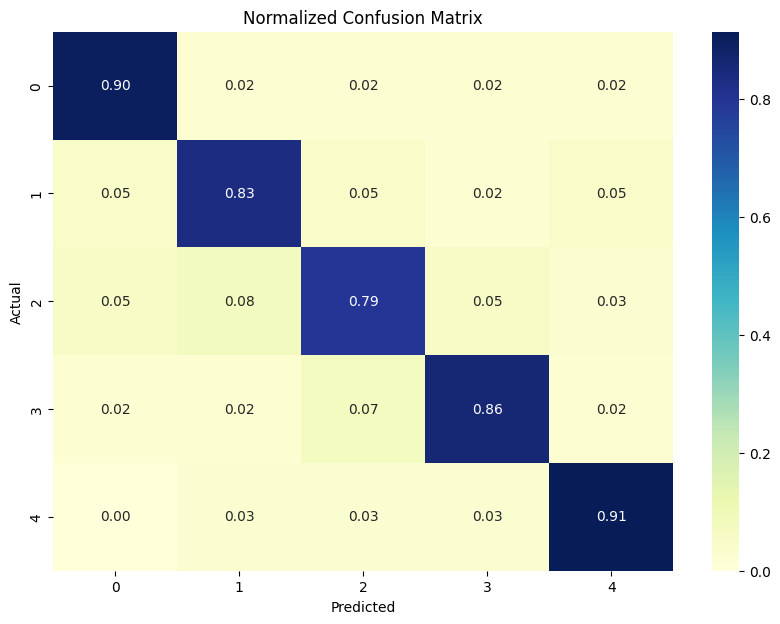

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Extra Trees for FOG

Accuracy: 93.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.95      0.91      0.93        43
           2       1.00      0.97      0.98        31
           3       0.89      0.93      0.91        44
           4       0.95      0.91      0.93        43

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



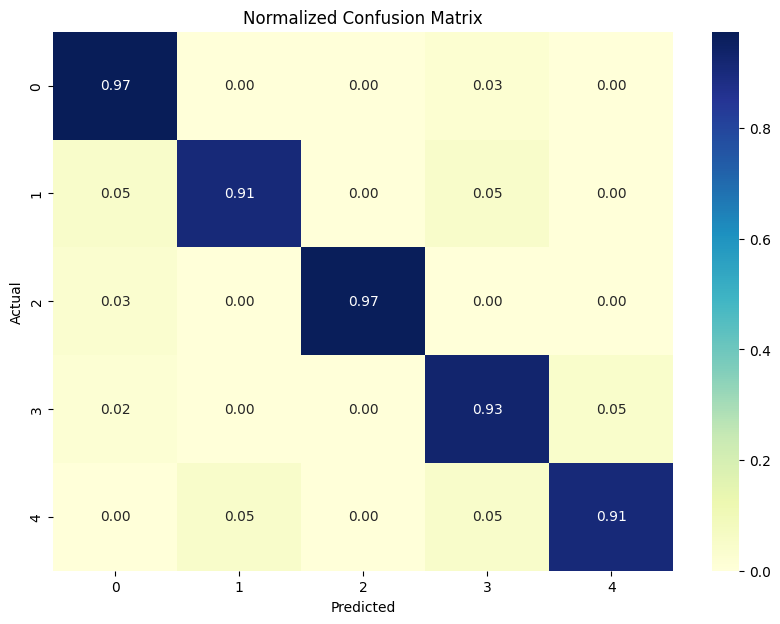

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Extra Trees classifier
clf = ExtraTreesClassifier(n_estimators=300, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [68]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical

# Create the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax')) # 5 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 198, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 97, 128)           24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 48, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6144)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

# CNN Model

In [69]:


# Reshape the input data to be suitable for Conv1D
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

# Convert the labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
y_onehot = to_categorical(y, num_classes=5) # Assuming 5 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=1)

# Create the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax')) # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
50/50 [==============================] - 17s 22ms/step - loss: 1.6147 - accuracy: 0.2163 - val_loss: 1.6113 - val_accuracy: 0.1950
Epoch 2/50
50/50 [==============================] - 1s 16ms/step - loss: 1.6102 - accuracy: 0.2025 - val_loss: 1.6094 - val_accuracy: 0.2150
Epoch 3/50
50/50 [==============================] - 1s 17ms/step - loss: 1.6041 - accuracy: 0.2087 - val_loss: 1.6011 - val_accuracy: 0.3400
Epoch 4/50
50/50 [==============================] - 1s 16ms/step - loss: 1.5589 - accuracy: 0.2962 - val_loss: 1.5136 - val_accuracy: 0.3000
Epoch 5/50
50/50 [==============================] - 1s 17ms/step - loss: 1.2970 - accuracy: 0.5225 - val_loss: 0.9960 - val_accuracy: 0.7250
Epoch 6/50
50/50 [==============================] - 1s 16ms/step - loss: 0.8984 - accuracy: 0.6700 - val_loss: 0.7428 - val_accuracy: 0.7450
Epoch 7/50
50/50 [==============================] - 1s 15ms/step - loss: 0.5591 - accuracy: 0.8087 - val_loss: 0.5689 - val_accuracy: 0.8100
Epoch 8/50
5